In [2]:
import pandas as pd                                     # To work on data manipulation 
import numpy as np                                      # It is used for numerical python
import seaborn as sns                                   # For Visualization
import matplotlib.pyplot as plt                         # For Visualization
from sklearn.model_selection import train_test_split    # To split the data (train and test)
from sklearn.linear_model import SGDRegressor           # To build the model (S.G.D)
from sklearn.preprocessing import StandardScaler        # To convert the predictor to the same scale(To scale down the data where mean =0 and std = 1) 
from sklearn.metrics import mean_squared_error          # To find the MSE (error)   To check the performance of your model 
from warnings import filterwarnings
filterwarnings('ignore')

In [59]:
df = pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [61]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [62]:
df.shape

(1338, 7)

# EDA

In [63]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [64]:
df[df.duplicated(keep = False)]

,age,sex,bmi,children,smoker,region,charges
195,19,male,30.59,0,no,northwest,1639.5631
581,19,male,30.59,0,no,northwest,1639.5631


In [65]:
df = df.drop_duplicates()
df.shape

(1337, 7)

In [66]:
new_df = df.copy()
new_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [67]:
new_df['charges']=np.log(new_df.charges)
new_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,9.734176
1,18,male,33.770,1,no,southeast,7.453302
2,28,male,33.000,3,no,southeast,8.400538
3,33,male,22.705,0,no,northwest,9.998092
4,32,male,28.880,0,no,northwest,8.260197


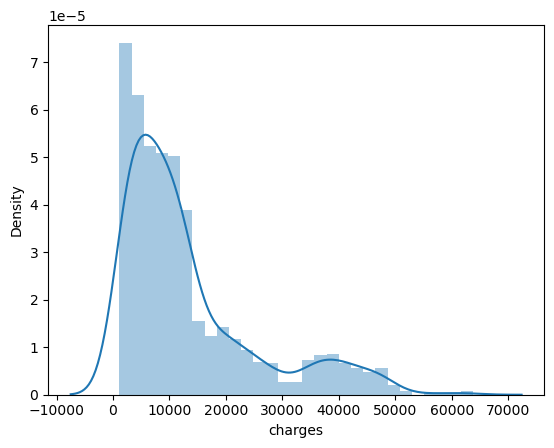

In [68]:
sns.distplot(df.charges)
plt.show()

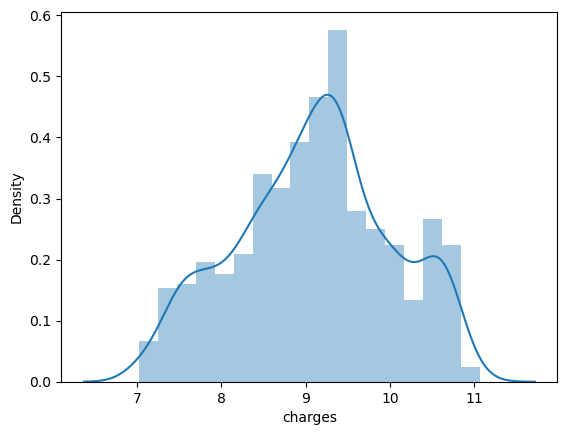

In [69]:
sns.distplot(np.log(df.charges))
plt.show()

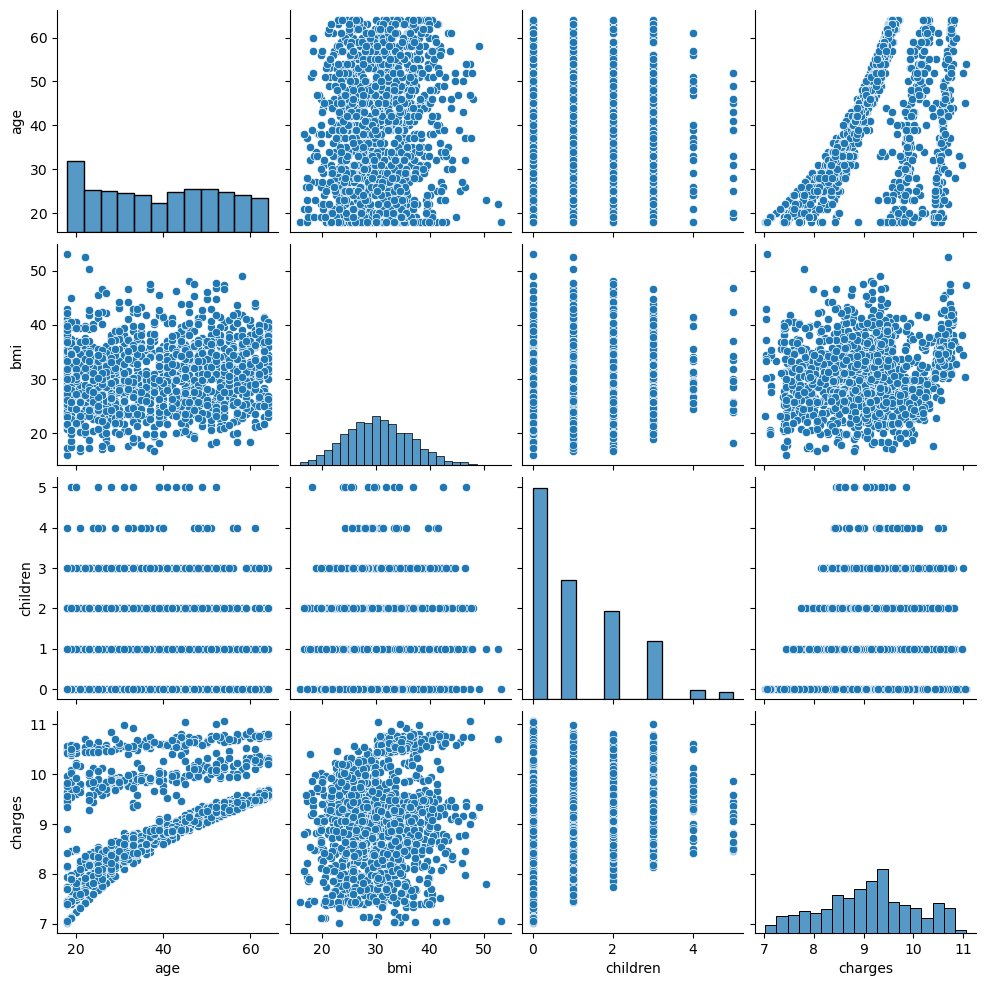

In [70]:
sns.pairplot(data = new_df)
plt.show()

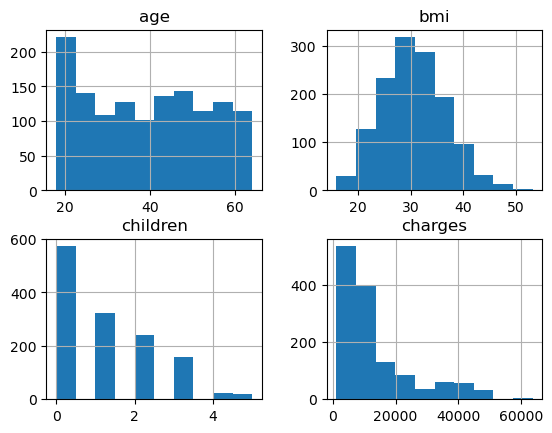

In [72]:
df.hist()
plt.show()

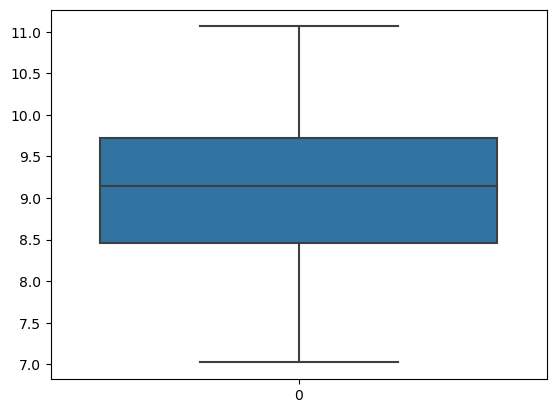

In [45]:
sns.boxplot(df.charges)
plt.show()

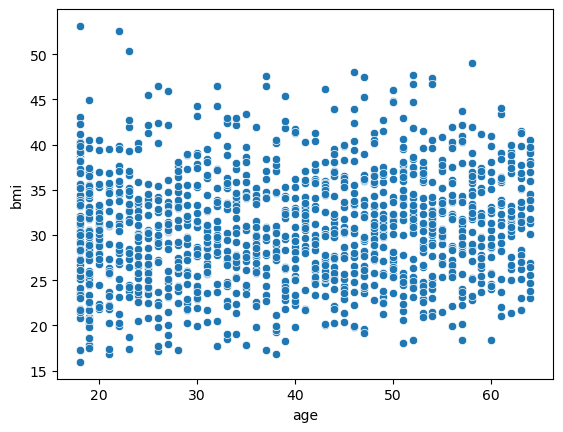

In [74]:
sns.scatterplot(x='age',y = 'bmi',data = new_df)
plt.show()

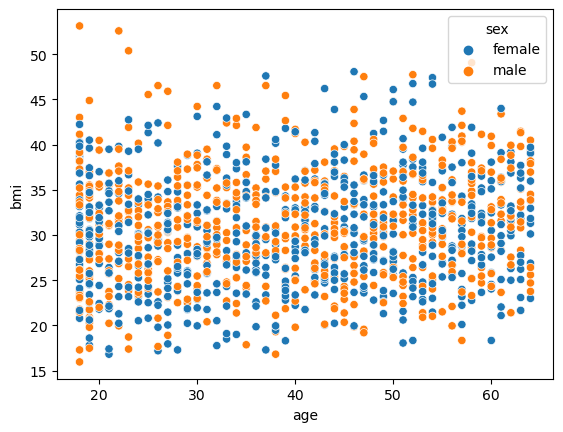

In [73]:
sns.scatterplot(x='age',y = 'bmi',data = new_df, hue = 'sex')
plt.show()

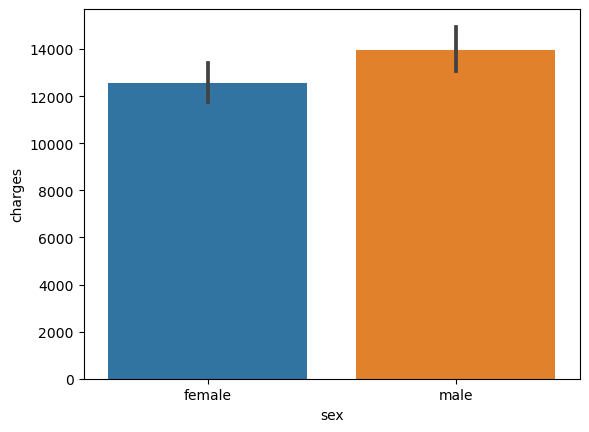

In [79]:
sns.barplot(x ='sex', y ='charges', data = df)
plt.show()

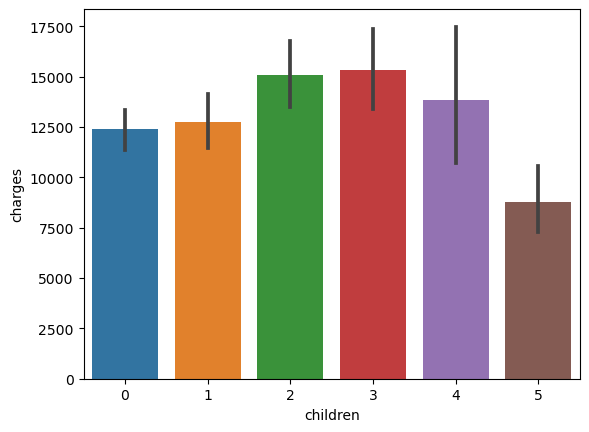

In [78]:
sns.barplot(x ='children', y ='charges', data = df)
plt.show()

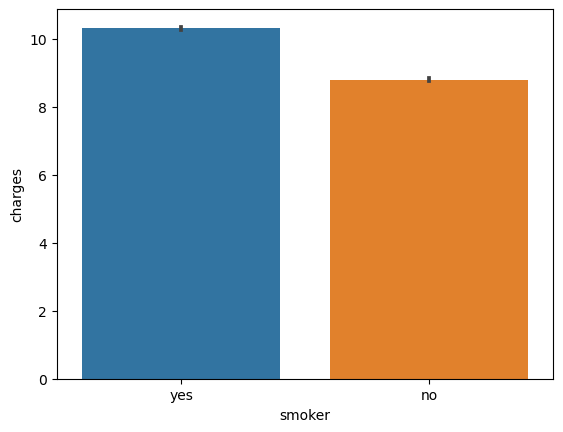

In [76]:
sns.barplot(x ='smoker', y ='charges', data = new_df)
plt.show()

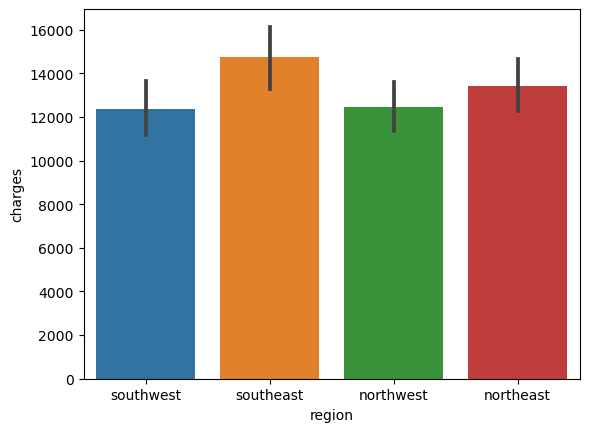

In [77]:
sns.barplot(x ='region', y ='charges', data = df)
plt.show()

# creating dummies

In [80]:
df1 = pd.get_dummies(data = new_df,drop_first= True)
df1.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,9.734176,False,True,False,False,True
1,18,33.770,1,7.453302,True,False,False,True,False
2,28,33.000,3,8.400538,True,False,False,True,False
3,33,22.705,0,9.998092,True,False,True,False,False
4,32,28.880,0,8.260197,True,False,True,False,False


# splitting x and y

In [93]:
y = df1.charges
y.head()

0    9.734176
1    7.453302
2    8.400538
3    9.998092
4    8.260197
Name: charges, dtype: float64

In [94]:
x = df1.drop('charges', axis = 1 )
x.head()

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,False,True,False,False,True
1,18,33.770,1,True,False,False,True,False
2,28,33.000,3,True,False,False,True,False
3,33,22.705,0,True,False,True,False,False
4,32,28.880,0,True,False,True,False,False


In [83]:
round(1337*0.8)

1070

In [95]:
x_train = new_df.iloc[0:1070]
x_test = new_df.iloc[1070:1337]

In [96]:
x_train.shape

(1070, 7)

In [97]:
x_test.shape

(267, 7)

In [90]:
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import statsmodels.formula.api as smf

In [98]:
model_1 = smf.ols(formula='charges ~ age + bmi + children + smoker + region',data = x_train).fit()
print(model_1.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.773
Model:                            OLS   Adj. R-squared:                  0.772
Method:                 Least Squares   F-statistic:                     516.8
Date:                Tue, 16 Jan 2024   Prob (F-statistic):               0.00
Time:                        20:26:27   Log-Likelihood:                -638.39
No. Observations:                1070   AIC:                             1293.
Df Residuals:                    1062   BIC:                             1333.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               6.9535    

In [99]:
x_train_1 = df1.iloc[0:1070]
x_test_1 = df1.iloc[1070:1337]

In [101]:
model_1 = smf.ols(formula='charges ~ age + bmi + children + smoker_yes + region_southeast + region_southwest',data = x_train_1).fit()
print(model_1.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.773
Model:                            OLS   Adj. R-squared:                  0.771
Method:                 Least Squares   F-statistic:                     602.1
Date:                Tue, 16 Jan 2024   Prob (F-statistic):               0.00
Time:                        20:33:11   Log-Likelihood:                -639.33
No. Observations:                1070   AIC:                             1293.
Df Residuals:                    1063   BIC:                             1327.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

In [102]:
new_ols_test1=x_test_1.copy()

In [103]:
y_test = new_ols_test1['charges']

In [105]:
new_ols_test1.columns

Index(['age', 'bmi', 'children', 'charges', 'sex_male', 'smoker_yes',
       'region_northwest', 'region_southeast', 'region_southwest'],
      dtype='object')

In [109]:
test = new_ols_test1.drop('charges', axis = 1)
test.head()

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
1071,63,31.445,0,True,False,False,False,False
1072,21,31.255,0,True,False,True,False,False
1073,54,28.880,2,False,False,False,False,False
1074,60,18.335,0,False,False,False,False,False
1075,32,29.590,1,False,False,False,True,False


# Prediction

In [111]:
model_2_prediction = model_1.predict(test)

In [112]:
model_2_prediction.head()

1071    9.581329
1072    8.081991
1073    9.430565
1074    9.303278
1075    8.431508
dtype: float64

# accuracy

In [116]:
from statsmodels.tools.eval_measures import rmse


# calculate rmse using rmse()
model2_rmse = rmse(y_test, model_2_prediction)

# calculate R-squared using rsquared
model2_rsquared = model_1.rsquared

# calculate Adjusted R-Squared using rsquared_adj
model2_rsquared_adj = model_1.rsquared_adj 
print('model2_rmse =',model2_rmse)
print('model2_rsquared =',model2_rsquared)
print('model2_rsquared_adj =',model2_rsquared_adj)

model2_rmse = 0.46628836616137226
model2_rsquared = 0.772659946103044
model2_rsquared_adj = 0.771376747304002


In [117]:
final_Result = pd.DataFrame({'Actual':np.exp(y_test),'Predicted':np.exp(model_2_prediction),'Residuals':(np.exp(y_test)-np.exp(model_2_prediction))})
final_Result.head()

,Actual,Predicted,Residuals
1071,13974.45555,14491.668996,-517.213446
1072,1909.52745,3235.670167,-1326.142717
1073,12096.65120,12463.562374,-366.911174
1074,13204.28565,10973.933355,2230.352295
1075,4562.84210,4589.416689,-26.574589


In [132]:
Predicted=np.exp(model_2_prediction)
Predicted.head()

1071    14491.668996
1072     3235.670167
1073    12463.562374
1074    10973.933355
1075     4589.416689
dtype: float64

In [122]:
Residuals=(np.exp(y_test)-np.exp(model_2_prediction))
Residuals.head()

1071    -517.213446
1072   -1326.142717
1073    -366.911174
1074    2230.352295
1075     -26.574589
dtype: float64

# assumptions

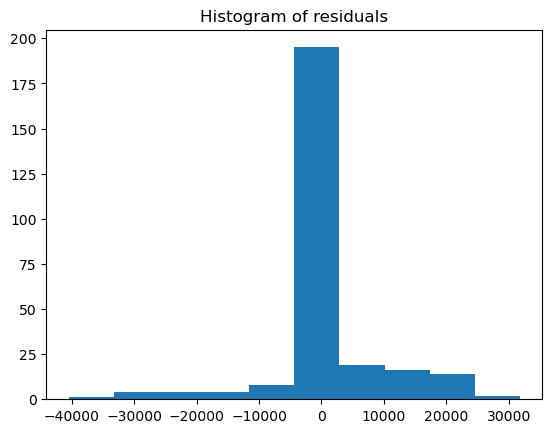

In [124]:
# Normality
plt.hist(Residuals)
plt.title('Histogram of residuals')
plt.show()

<Axes: ylabel='Density'>

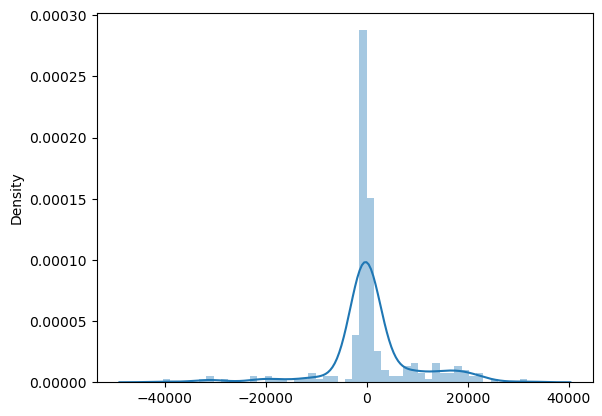

In [125]:
sns.distplot(Residuals)

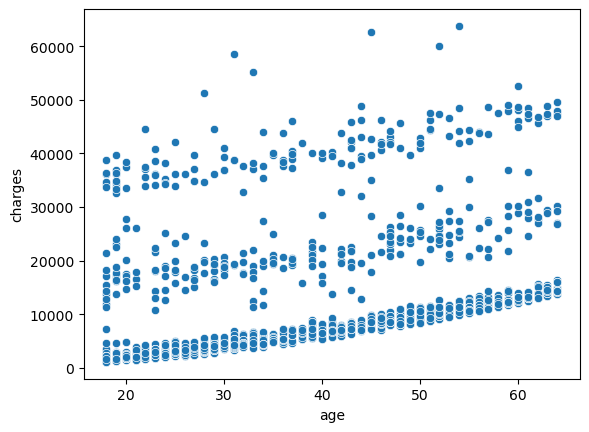

In [126]:
#Linearity
sns.scatterplot(data = df,x = df.age,y = df.charges)
plt.show()

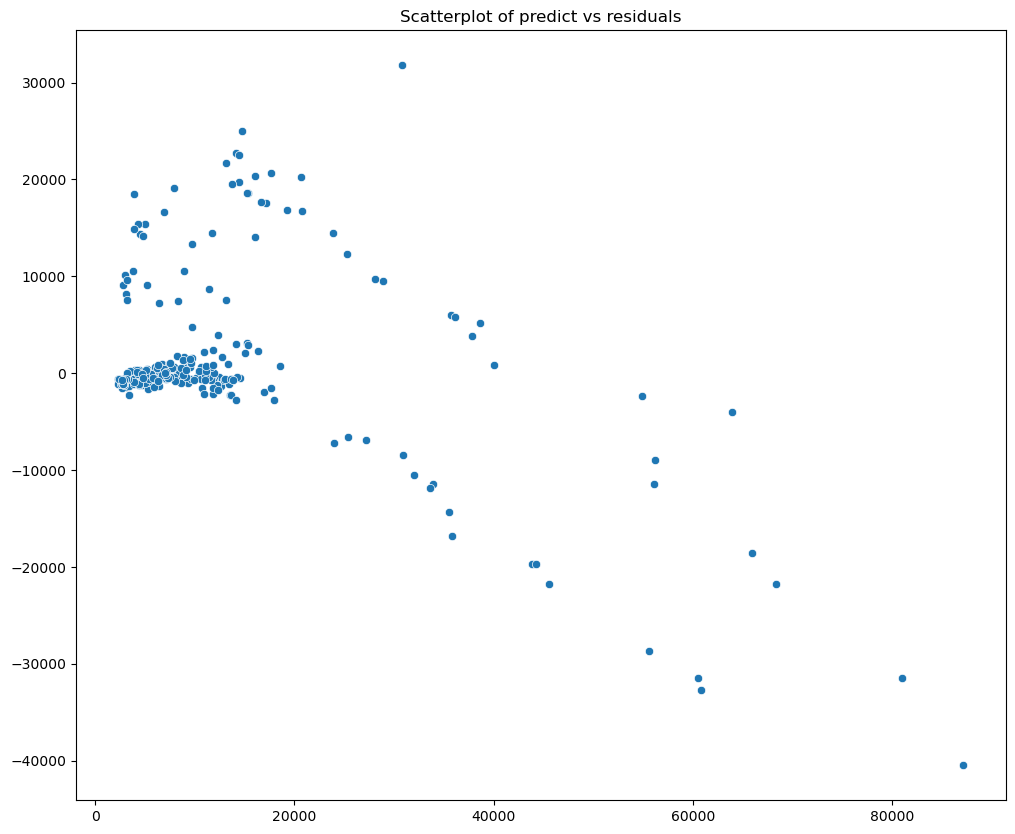

In [134]:
#homoscadasticity
plt.figure(figsize=(12,10))
sns.scatterplot(x=Predicted,y=Residuals)
plt.title('Scatterplot of predict vs residuals')
plt.show()